In [2]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
# seaborn comes with default presets (called 'contents') for figure's aesthetics, 
# such as the font size, figure size etc. 
sns.set_context('talk') # try: 'talk', 'poster', 'notebook'

In [3]:
df = pd.read_csv('result_final.csv', encoding='utf-8')
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])
df['proband'] = df['proband'].apply(lambda x: x.capitalize())

In [4]:
df

,Unnamed: 0,test_image,response,resptime,proband,rotation,image,category,sigma
0,0,nature_3_r.jpeg,4,28.686909,Louis,True,nature_3,nature,original
1,1,portrait_9_4.jpeg,1,2.191806,Louis,False,portrait_9,portrait,4
2,2,art_6_20.jpeg,2,4.689927,Louis,False,art_6,art,20
3,3,art_9_12.jpeg,2,3.736233,Louis,False,art_9,art,12
4,4,nature_10_7.jpeg,1,1.395104,Louis,False,nature_10,nature,7
...,...,...,...,...,...,...,...,...,...
2095,2095,art_4_20.jpeg,5,0.700461,Philipp,False,art_4,art,20
2096,2096,portrait_9_7.jpeg,3,2.584903,Philipp,False,portrait_9,portrait,7
2097,2097,nature_6_r_7.jpeg,5,1.550584,Philipp,True,nature_6,nature,7
2098,2098,nature_7_r_20.jpeg,5,1.204270,Philipp,True,nature_7,nature,20


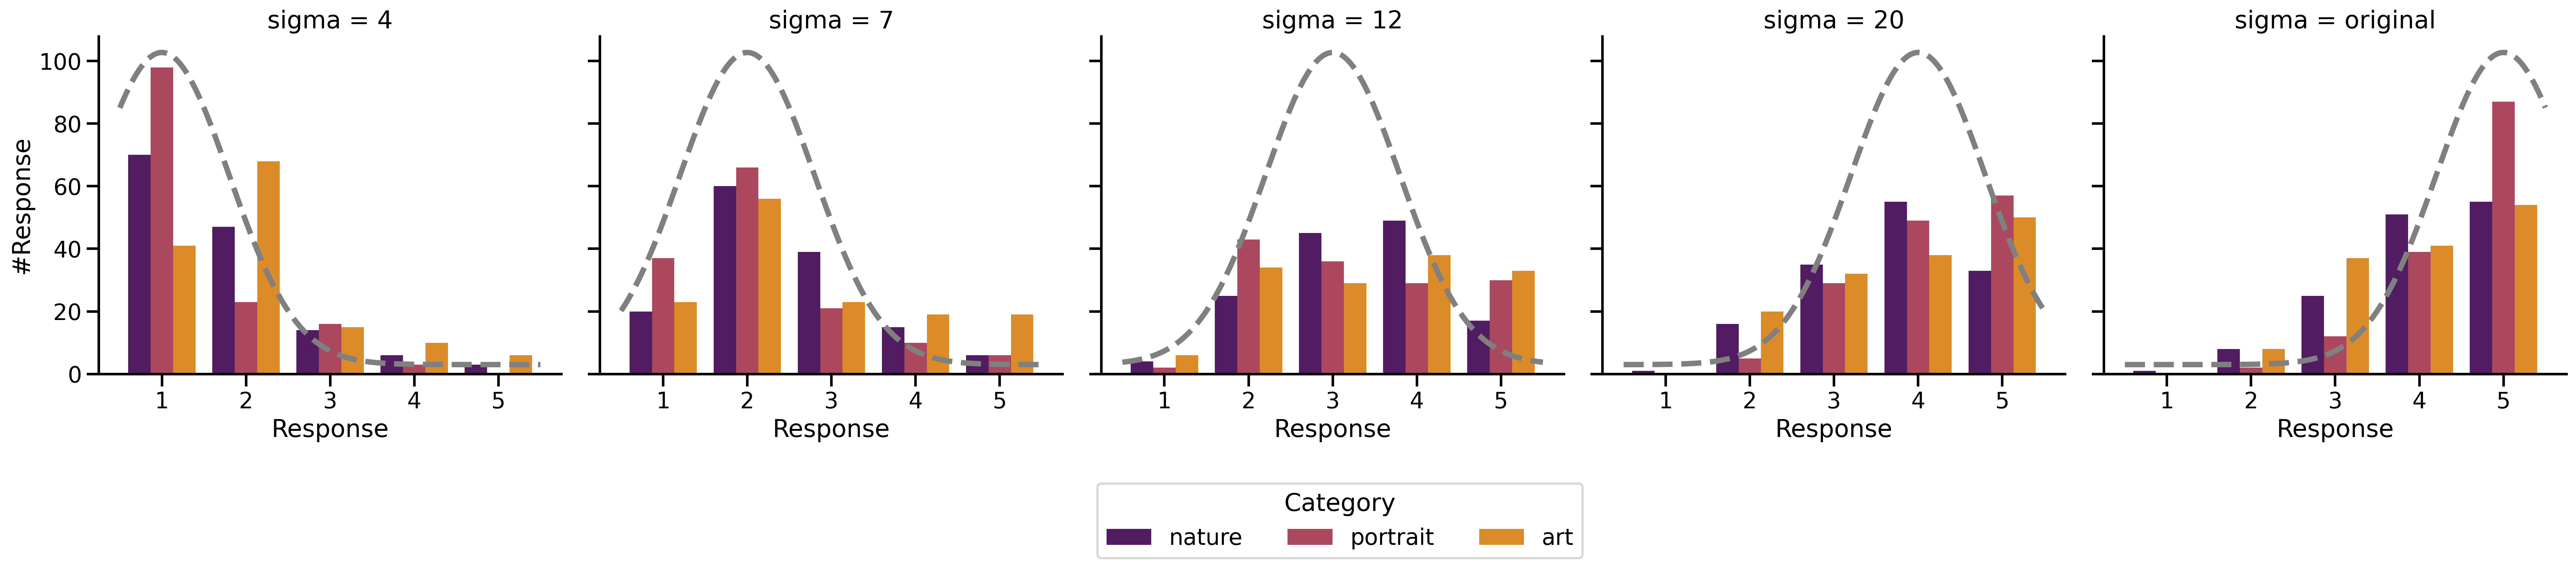

In [13]:
# catplot für alle probanden
g = sns.catplot(x='response', data=df, hue='category', kind='count',
                palette='inferno', col='sigma')
g.set(xlabel='Response', ylabel='#Response')
plt.tight_layout()
g.fig.set_dpi(300)
x_axis = np.arange(-0.5, 4.5, 0.001)
for ax, sigma in zip(g.axes_dict.values(), sorted(list(df['response'].unique()))):
    ax.plot(x_axis, norm.pdf(x_axis,sigma-1,0.8)*200+3, ls="--", zorder=100, linewidth=4, color='grey')
sns.move_legend(g, "lower center", bbox_to_anchor=(0.52, -0.2), ncol=3, title='Category', frameon=True)

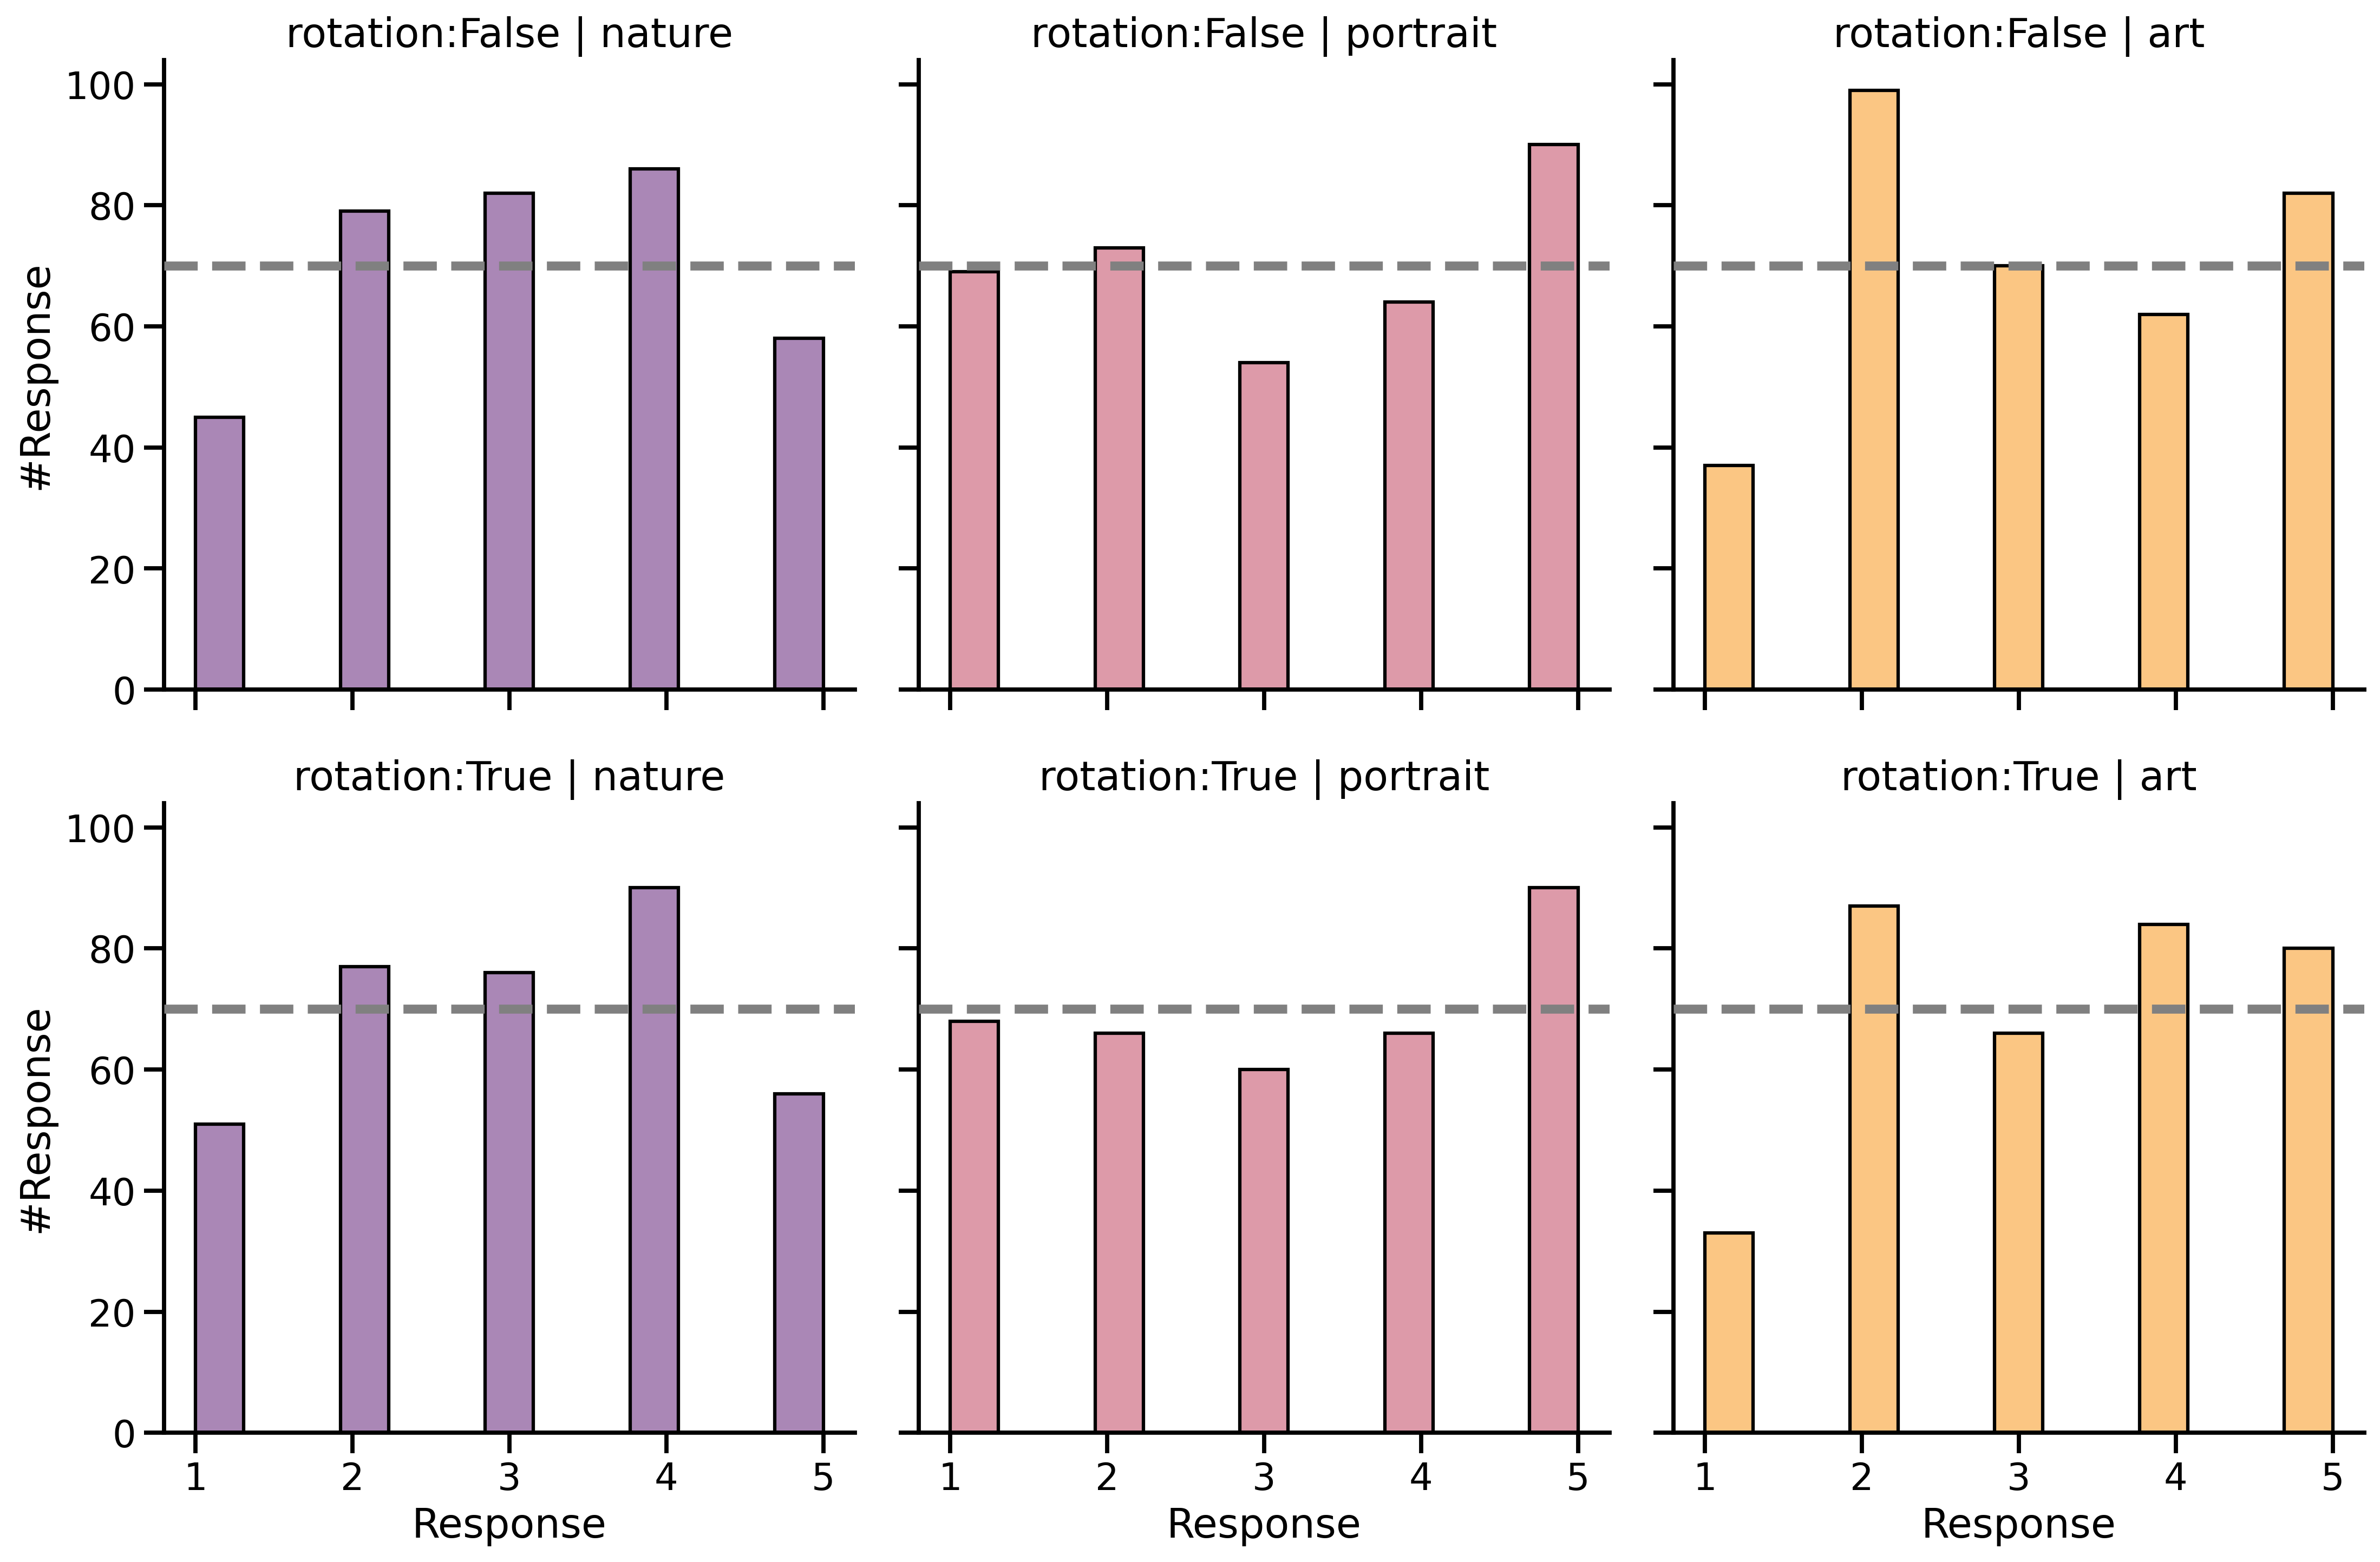

In [5]:
#distplot by category and rotation, alle probanden
g = sns.displot(x='response', data=df, kind='hist', palette='inferno', col='category',
                hue="category", row='rotation', legend=False)

plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
g.fig.set_dpi(300)
g.set_titles('rotation:{row_name} | {col_name}')
g.set_ylabels('#Response')
for ax in g.axes_dict.values():
    ax.axline((1, 70), slope=0, ls="--", zorder=100, linewidth=4, color='grey')

g.set_xlabels('Response')

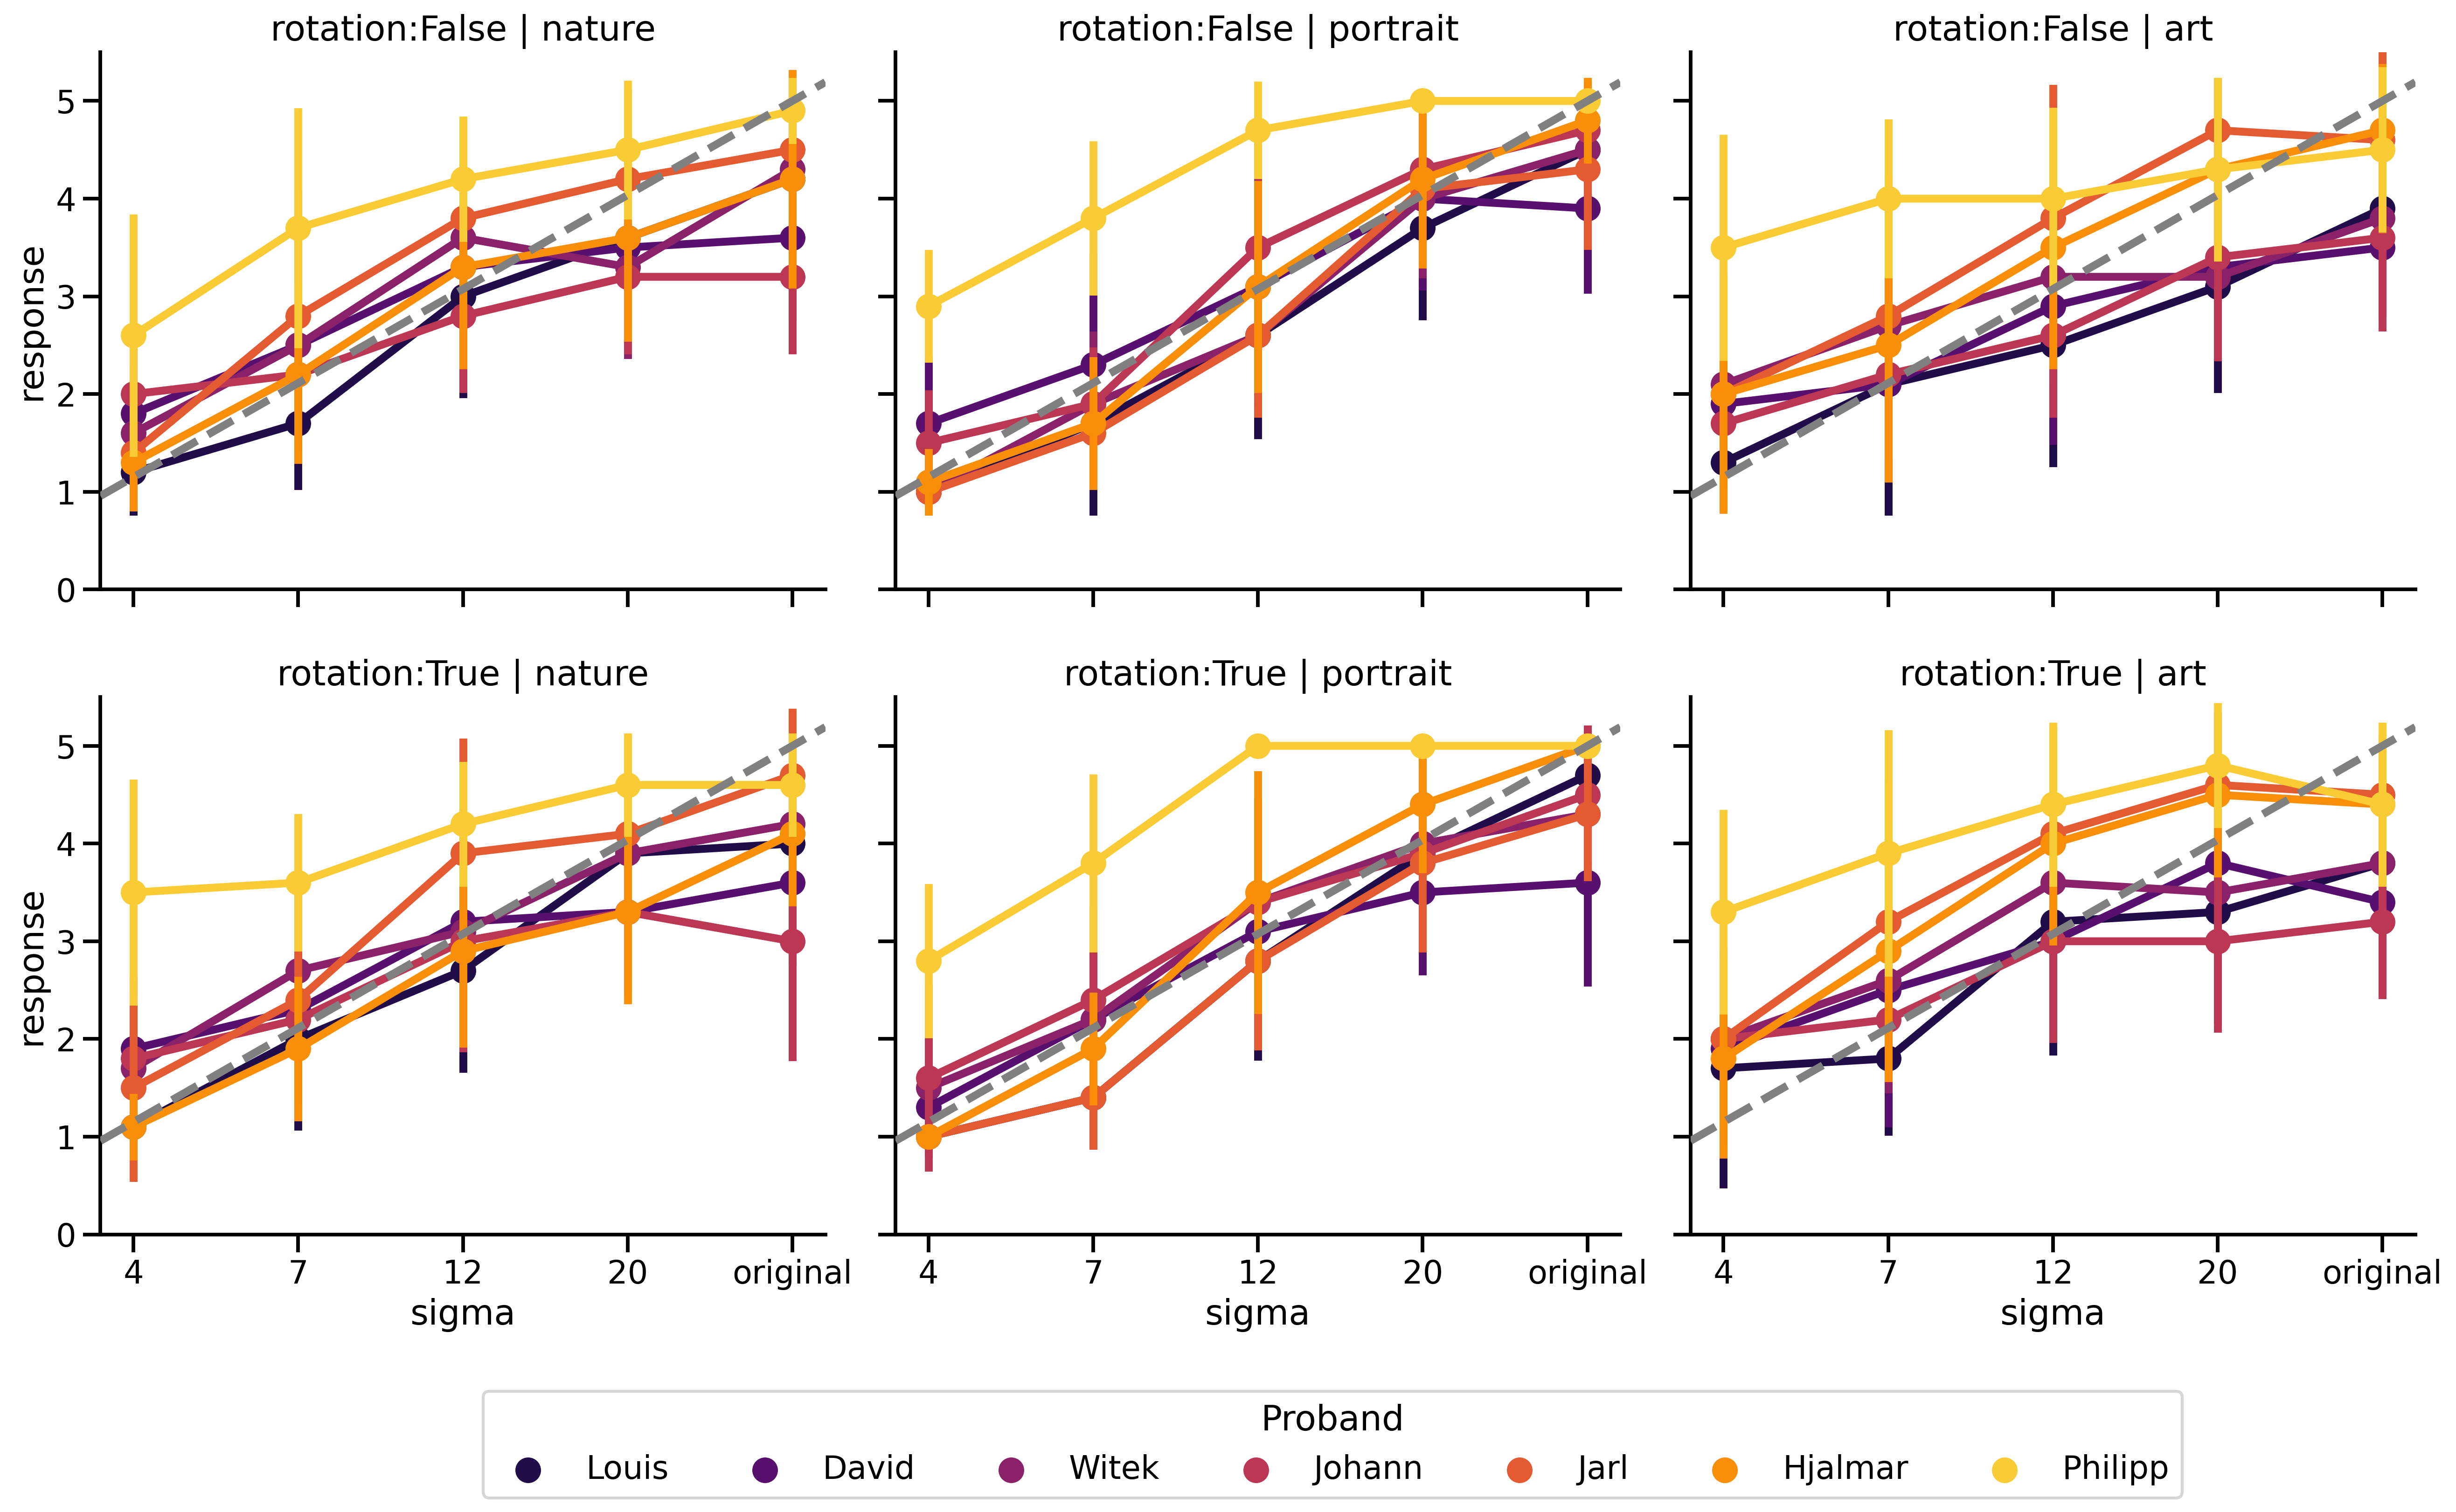

In [6]:
#catplot alle
g = sns.catplot(x='sigma', y='response', data=df, col ='category', row='rotation',
                kind='point', ci='sd',
                palette='inferno', hue='proband', estimator=np.mean)

g.set_titles('rotation:{row_name} | {col_name}')
g.fig.set_size_inches(20, 10)
plt.subplots_adjust(hspace=0.2)
g.fig.set_dpi(300)
g.set(ylim =(0, 5.5))
g.set(yticks=np.arange(0,6,1))
for ax in g.axes_dict.values():
    ax.axline((0, 1.15),(4,5), ls="--", zorder=100, linewidth=4, color='grey')
sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.1), ncol=7,title='Proband', frameon=True)

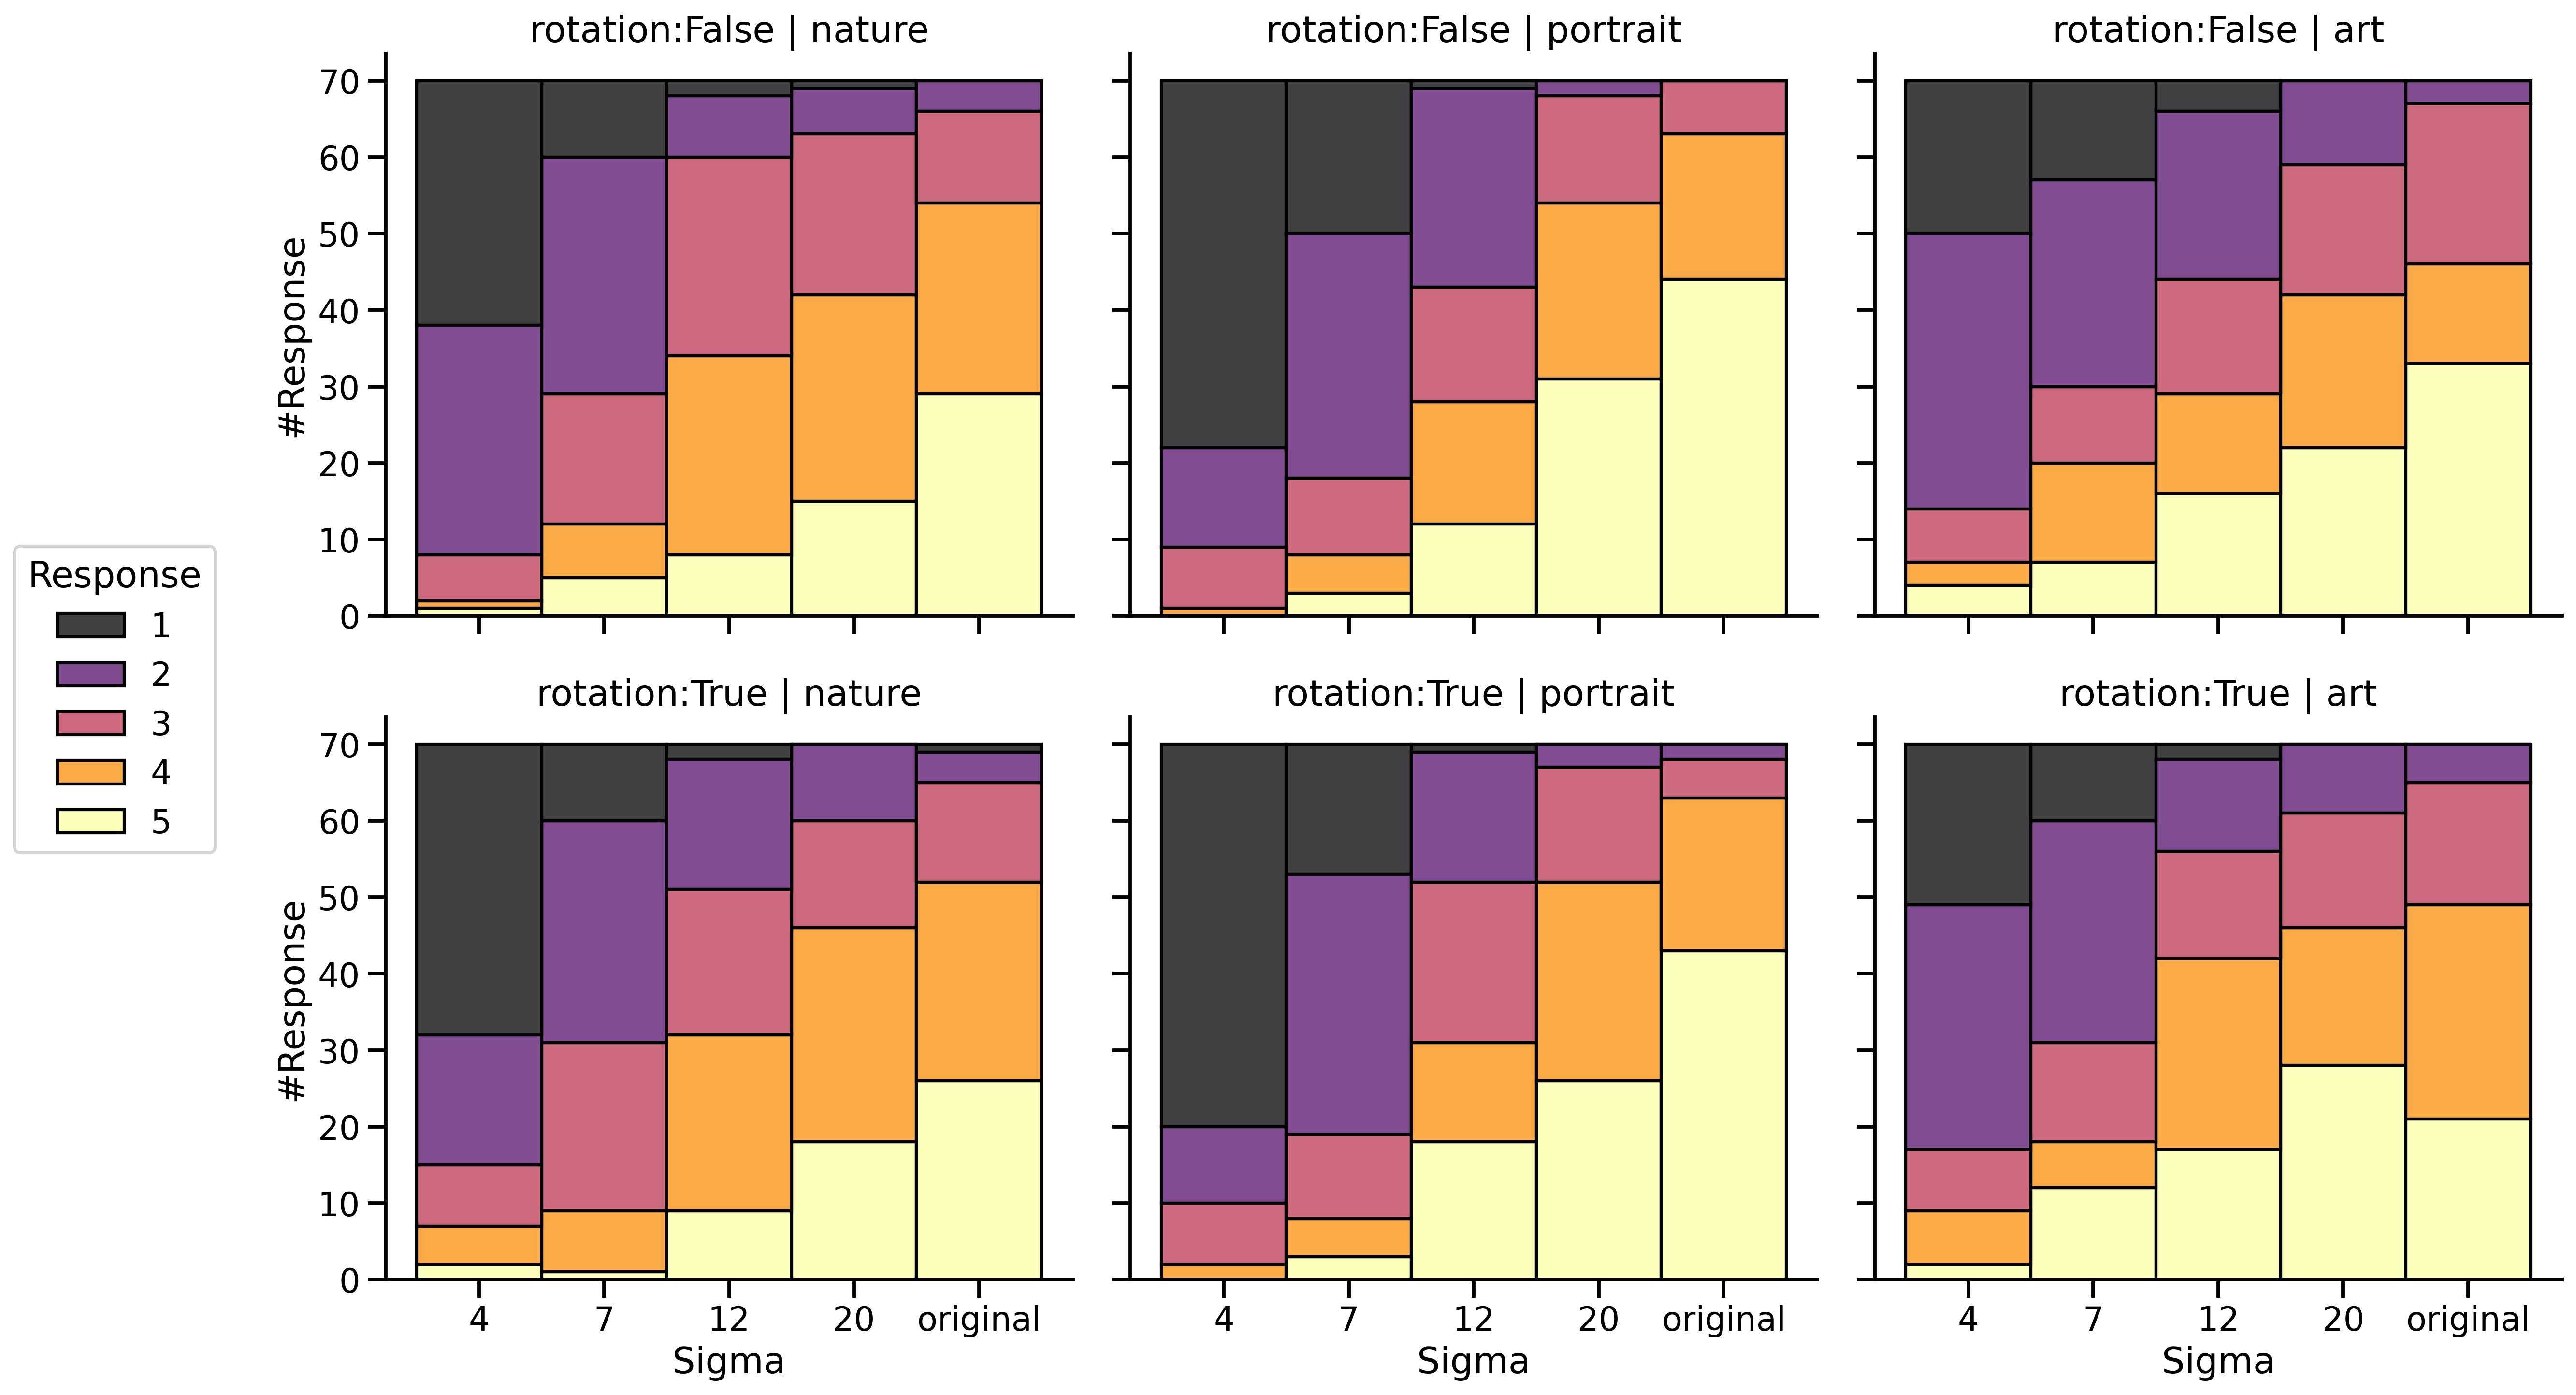

In [7]:
#distplot by category and rotation, alle probanden
#https://seaborn.pydata.org/tutorial/distributions.html
g = sns.displot(x='sigma', data=df, kind='hist', palette='inferno', col='category',
                hue="response", row='rotation', multiple="stack")
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
g.fig.set_dpi(300)
g.set_titles('rotation:{row_name} | {col_name}')
g.set_ylabels('#Response')

g.set_xlabels('Sigma')
sns.move_legend(g, "center left", bbox_to_anchor=(-0.1, 0.5), ncol=1, title='Response', frameon=True)

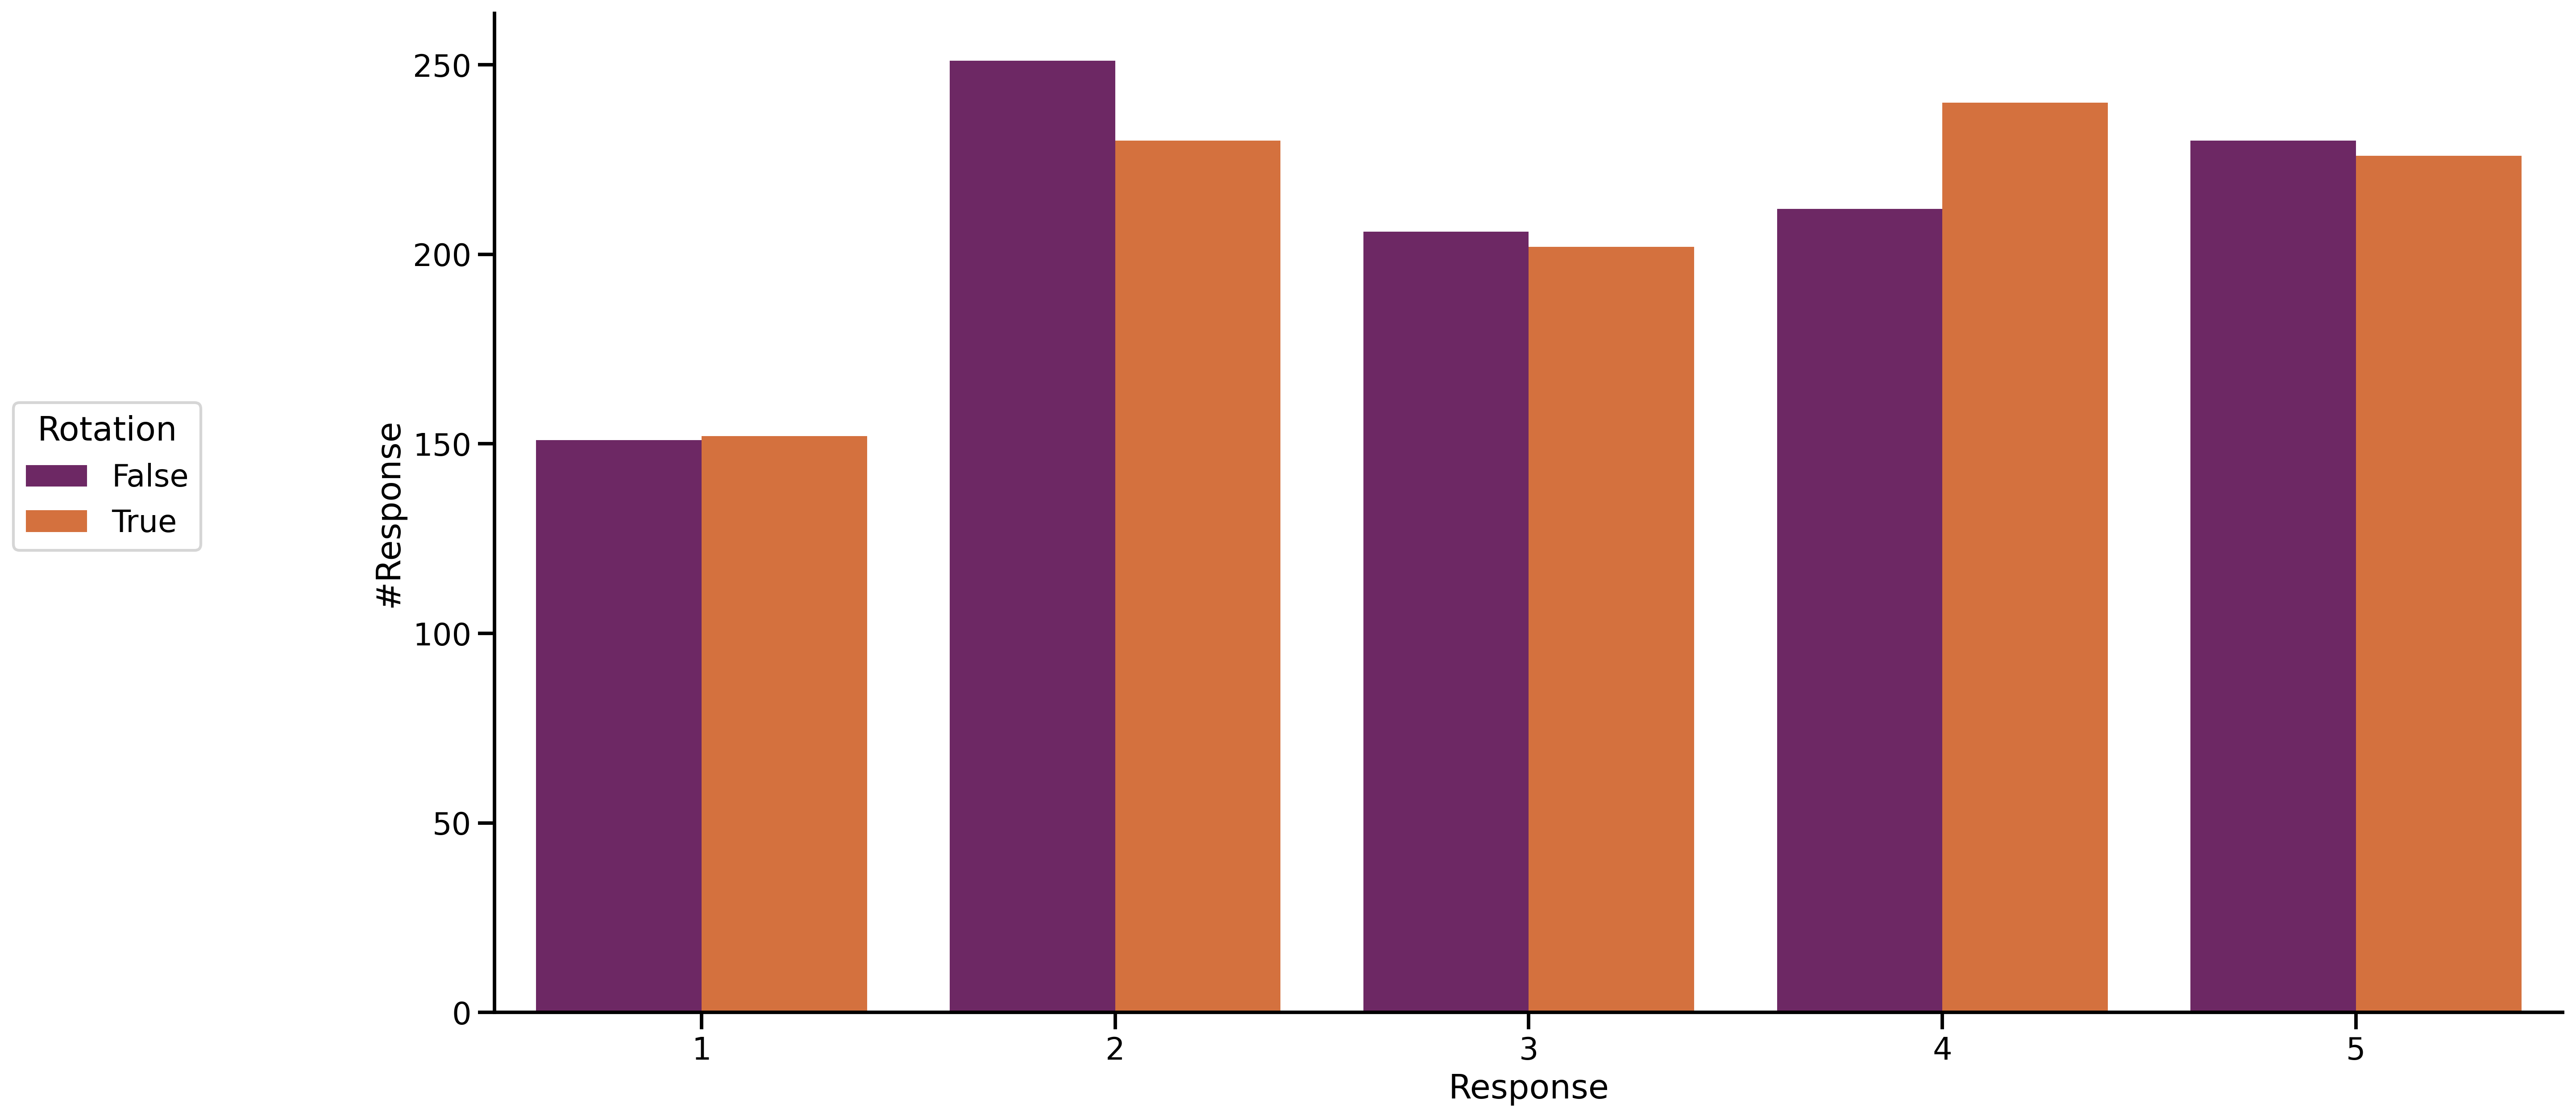

In [8]:
g = sns.catplot(x='response', data=df, hue='rotation', kind='count',
                palette='inferno')
g.set(xlabel='Response', ylabel='#Response')
plt.tight_layout()
g.fig.set_size_inches(20, 10)
g.fig.set_dpi(300)
sns.move_legend(g, "center left", bbox_to_anchor=(0.0, 0.6), ncol=1, title='Rotation', frameon=True)